# Time Series Forescasting with Arima, RNN

## Author:HSO




# Auto-Regresssive Model (ARIMA)

Considering the fact that simpole assumtions such as random noise to be trully random, and that follows independent identical distribution is sometimes very limited, making the smothing very weak to model the a time series process and set up a forescasting model.

To overcome this, auto-regressive model can be useful for forescat in previous conditions, since these models adjust immediatly using the prior lag values and exploring inhrenent serial correlation between consecutive observations. ARIMA introduces a auto-regressive terms or moving average terms. These components can be used in multiple ways for time series forescating suach as moving- average (MA), auto-regressive moving average (ARMA), and auto-regressive Integrated moving average (ARIMA). The MA(q) with order q, is an auto-regressive moving average model based on lag regression.




Outline

* Moving Average (MA)
* Auto-regressive (AR)
* Auto-regressive moving average (ARMA)
* Auto-regressive integrated moving average (ARIMA)
* Summary
* Introduction

The concept od auto-regressive models in time series is referred to models that are developed by regressing on previous valeus. For example, $x_t$ is a response at time $t$ and the model is developed as

$$
x_t = \varnothing x_{t-1} + \epsilon
$$

The preceding equation is as simple example of an AR(1) model, where $\varnothing$ corresponds to the model coefficient and $\epsilon$ is the error. Additionally, similar to the regression model, error normality assumtion stays for an auto-regressive model as well as consideration of stationarity or homoscedastic. 

## Auto-regrressive models

One common apporach to regress on time series is to regress it with its lag term, being referrend as auto-regressive models (AR models). These genre of models are are very good in capturing trends as the next values are predicted based ion prior time values, making useful in cases where the next forecasted value corresponds to a function of the previous time period, as example incrrease of stock price gain, whih price expected to keep increasing as a function of time as the trend component.

The auto-regressive model is defined as AR($q$), where the $p$ refers to the order of the AR component.

The first-order AR model is denoted by AR(1):

$$
x_t = \varnothing x_{t-1}\epsilon_{t-1} + \epsilon_t
$$

the $p^{th}$ AR model is denoted by AR(p):

$$
x_t = \varnothing_1 x_{t-1}\epsilon_{t-1} + \varnothing_2 x_{t-2}\epsilon_{t-2} + \dots + \varnothing_p \epsilon_{t-p} + \epsilon_t
$$

To note that $\varnothing$ correspond sto the model coefficient, $\epsilon_t \sim N(0, \sigma^2)$ is an error in time $t$, and $p$ is the order of the AR model. Lets make use of a simple setup similar to moving average models


## Some measurements criterias

AIC and BIC are information criteria for comparing models. Each tries to balance model fit and parsimony and each penalizes differently for number of parameters.

AIC is Akaike Information Criterion the formula is

$$
AIC = -2 * \ln(likelihood) + 2 * k,
$$

where $K$ is number of parameters and 𝐿 is maximum likelihood; with this formula, smaller is better. 

BIC is Bayesian Information Criterion, the formula is

$$
BIC = -2 * \ln(likelihood) + \ln(N) * k
$$

where $k$ is the model degrees of freedom and $N$ the number of observations, and it favors more parsimonious models than AIC.


#### Note: 
Clearly, AIC does not depend directly on sample size. Moreover, generally speaking, AIC presents the danger that it might overfit, whereas BIC presents the danger that it might underfit, simply in virtue of how they penalize free parameters $(2*k$ in AIC; $ln(N)*k$ in BIC). Diachronically, as data is introduced and the scores are recalculated, at relatively low $N$ (7 and less) BIC is more tolerant of free parameters than AIC, but less tolerant at higher $N$ (as the natural $\log$ of $N$ overcomes 2).

Additionally, AIC is aimed at finding the best approximating model to the unknown data generating process (via minimizing expected estimated $K-L$ divergence). As such, it fails to converge in probability to the true model (assuming one is present in the group evaluated), whereas BIC does converge as N tends to infinity.


#### Link:
http://www.stats.ox.ac.uk/~ripley/Nelder80.pdf


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -U seaborn==0.9.0


     |████████████████████████████████| 215kB 6.5MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


In [3]:
BASE_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/'

PLOTS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/plots/'
DUMPS_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/dumps/'
DATA_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/data/'
CHECK_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/checkpoints/'

IMAGES_PATH = '/content/drive/MyDrive/PRODEI_PSST/hso_psst_final_delivery/images/'

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
import pandas as pd 


def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
        xt = pd.Series(xt)
    
    fig_plt = plt.figure(figsize=fig_size)
    layout = (2, 2)

    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))

    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf) # Plot the autocorrelation
    plot_pacf(xt, lags=50, ax=ax_pacf) # Plot the partial autocorrelation
    plt.tight_layout()
    
    return None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The script will generate an artificial data for the AR(1) scenario with serial correlation defined for the previous lag as 0.6. MA component is set to zero, reminving any effect of the time series signal. 

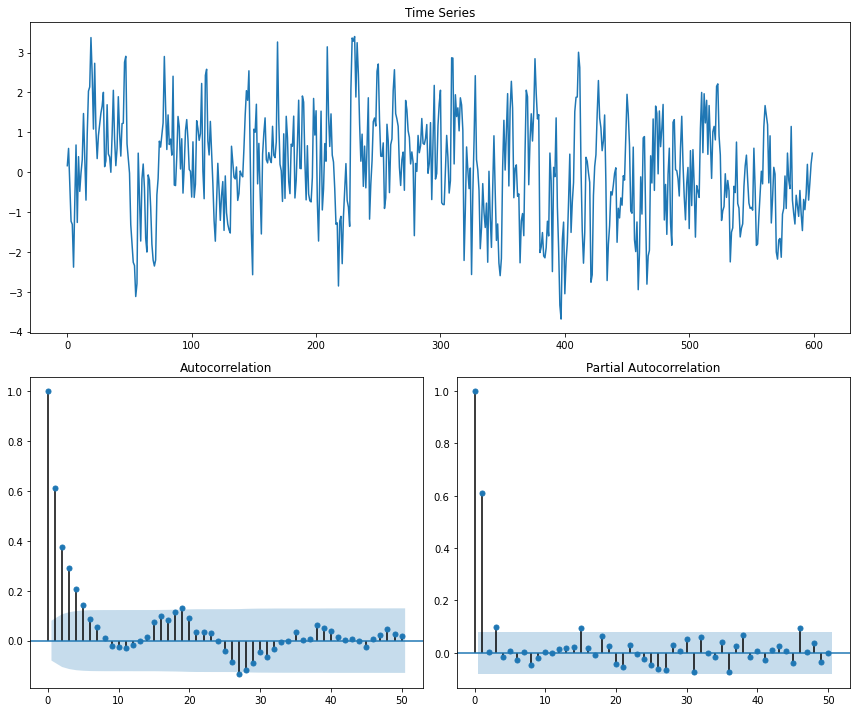

In [5]:
import statsmodels.tsa.api as smtsa
import numpy as np


# Set the number of samples
n = 600

# Generate the AR(1) data with lag 0.6
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ar1_data)

We can summarize the model as $x_t = \varnothing_1 x_{t-1}\epsilon_{t-1} + \epsilon_t$ with data simulated using the AR componnent to be less that 1 (0.6), then autocorrelation will decrease over time following the relation between $\varnothing$ and $t$ as:

$$
x_t = \varnothing_1 x_{t-1} + \epsilon_t = \varnothing_1(\varnothing_1 x_{t-1} + \epsilon_{t-1}) + \epsilon_t = = \varnothing_1^2 x_{t-2} + \varnothing_1 \epsilon_{t-1} + \epsilon_t
$$

Thus, the ACF graoh decreases exponentially whereas as PACF removes the lag effect while computing correlation, only significant terms are captured. The $\varnothing$ value affects the signal stationarity. Increasing $\varnothing$ up to 0.95, the model tends to non-stationarity

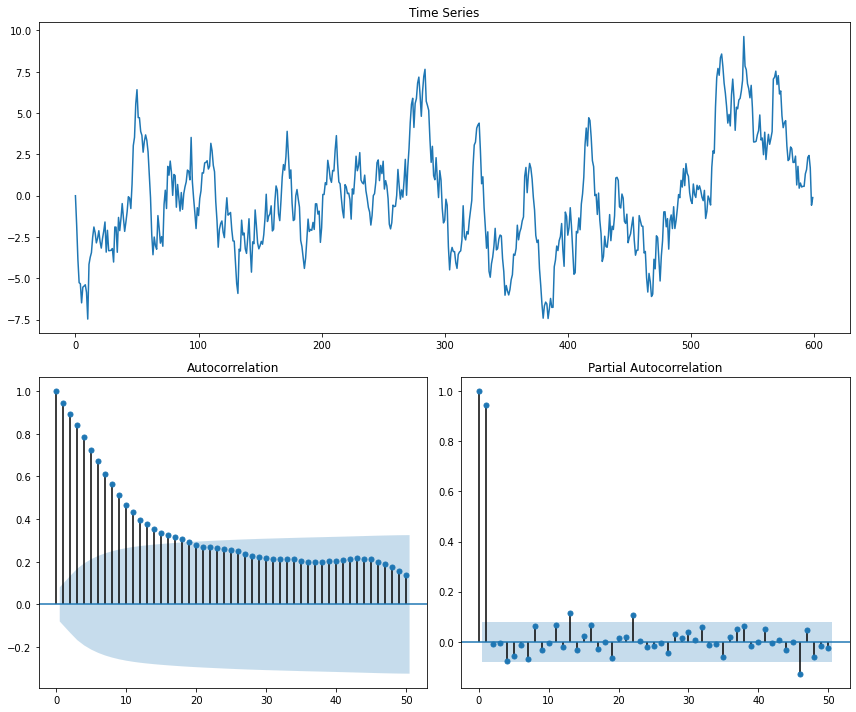

In [6]:
# Generate the AR(1) data with lag 0.95
ar = np.r_[1, -0.95]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ar1_data)

Cosidering a scenario with $\varnothing > 1$, the model becomes non-stationary


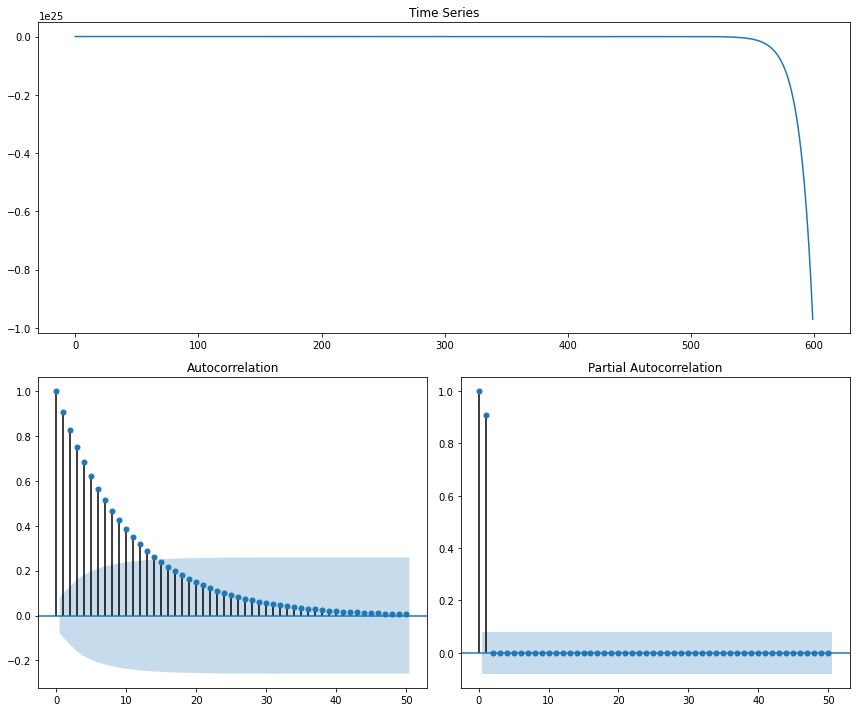

In [7]:
ar = np.r_[1, -1.1]
ma = np.r_[1, 0]
ar11_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ar11_data)

High order AR models can be also generated to acccess the effects of PACF component with order. Lets set a AR(2) and AR(3) as

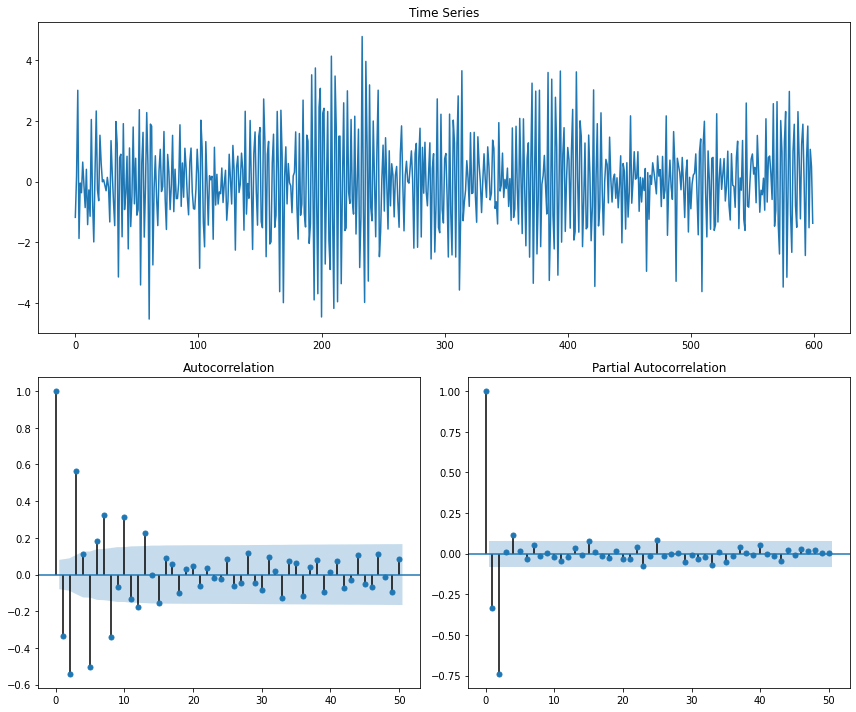

In [8]:
# Build an AR(2)
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ar2_data)

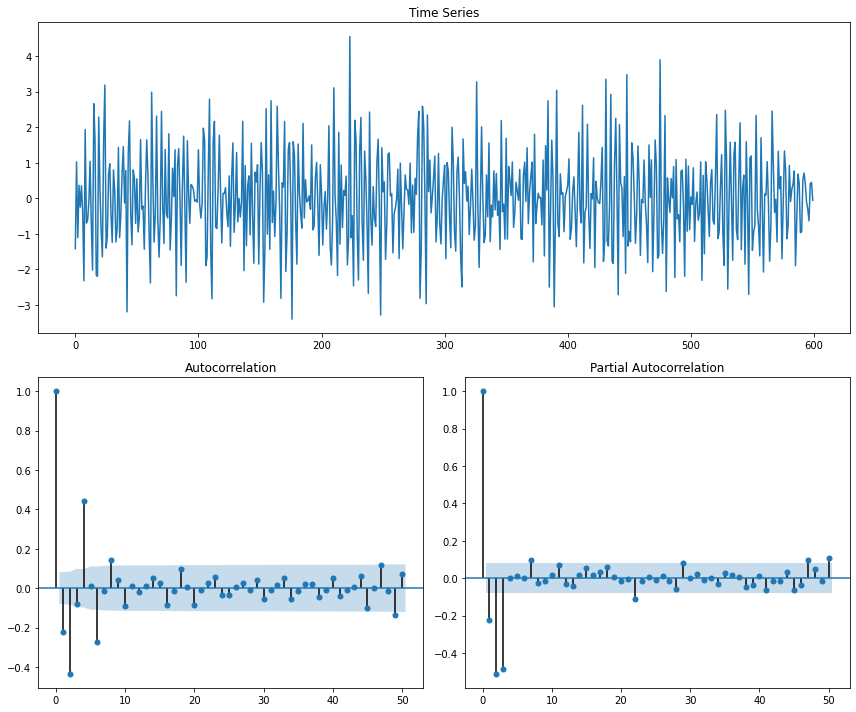

In [9]:
# Build an AR(3)
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ar3_data)

Is possible to observe from different data sources, that PACF is captutring the AR component and $q$ corresponds to the value where its significan. The model for AR1 can be also evaluated using the ARMA.fit 


In [10]:
# Build AR(1) model

ar1_model = smtsa.ARMA(ar1_data.tolist(), order= (1, 0))
ar1 = ar1_model.fit(maxlag= 30, method= 'mle', trend= 'nc')
ar1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -884.932
Method:                           mle   S.D. of innovations              1.056
Date:                Thu, 31 Dec 2020   AIC                           1773.863
Time:                        15:07:13   BIC                           1782.657
Sample:                             0   HQIC                          1777.286
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9433      0.013     71.527      0.000       0.917       0.969
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0601           +0.0000j            1.0601            0.0000
-----------------------------------------------------------------------------
"""

We simulated the AR model using a lag serial correlaiton of 0.6 and the fitted  value is close to 0.62, that is close in term so relashionship. Lets evaluate the AR(3) on our generated dataset with a actual generated lag relashionship of 0.6, 0.7 and 0.5 and the outcome is


In [11]:

ar3_model = smtsa.ARMA(ar3_data.tolist(), order= (3, 0))
ar3 = ar3_model.fit(maxlag= 30, method= 'mle', trend= 'nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -826.790
Method:                           mle   S.D. of innovations              0.959
Date:                Thu, 31 Dec 2020   AIC                           1661.580
Time:                        15:07:16   BIC                           1679.167
Sample:                             0   HQIC                          1668.426
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5816      0.036    -16.222      0.000      -0.652      -0.511
ar.L2.y       -0.6693      0.033    -20.293      0.000      -0.734      -0.605
ar.L3.y       -0.4798      0.036    -13.415      0.000      -0.550      -0.410
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0565           -1.1744j            1.1757           -0.2424
AR.2            0.0565           +1.1744j            1.1757            0.2424
AR.3           -1.5077           -0.0000j            1.5077           -0.5000
-----------------------------------------------------------------------------
"""

The model fitted shows a relashioship of 0.58, 0.67 and 0.44, which is quite close to the real relatioship. Both AR and MA can be used to correct the serial dependency but usually, positive autocorrelation is corrected using the AR models and negative dependency is coorrected using the MA models

## Moving average models

The moving average modles use dependency between residual errors to forecast values in the next time pediod. The model helps to adjust for any unprecitible events such as catastrophic events leading to a abrupt time series change such as stock marked crash, that occurs over time and its captured as a moving average process.

The first order MA(1) is defined as:

$$
x_t = \alpha  - \theta_1 \epsilon_{t-1} + \epsilon_t
$$

The second order MA(2) is defined as:

$$
x_t = \alpha  - \theta_1 \epsilon_{t-1}  - \theta_1 \epsilon_{t-2} + \epsilon_t
$$

and so on

here, $\epsilon_t$ corresponds to the indentically independently-distributed error at time $t$ and follows norma distribution $N(0, \sigma_{\epsilon_t}^2)$ with zero meand and $\sigma_{\epsilon_t}^2$ varince. The $\epsilon_t$ component represnrts the error in time $t$ and the $\alpha$ and $\epsilon$ notations represent the mean intercept and error coefiecients, respectively. The moving average time series with $q^{th}$ order is here presented as $MA(q)$. This not changes the expectiation value for $MA(q)$, that can be defined as:

$$
E(x_t) = E(\alpha - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \cdots - \theta_q \epsilon_{t-q} + \epsilon_t) = \alpha
$$

Contrary, the variance increases and can be defined as

$$
var(x_t) = var( \alpha - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \cdots - \theta_q \epsilon_{t-q} + \epsilon_t) = \alpha\\

var(x_t) = \sigma^2 (1 + \theta_1 + \theta_2 + \cdots + \theta_q)
$$




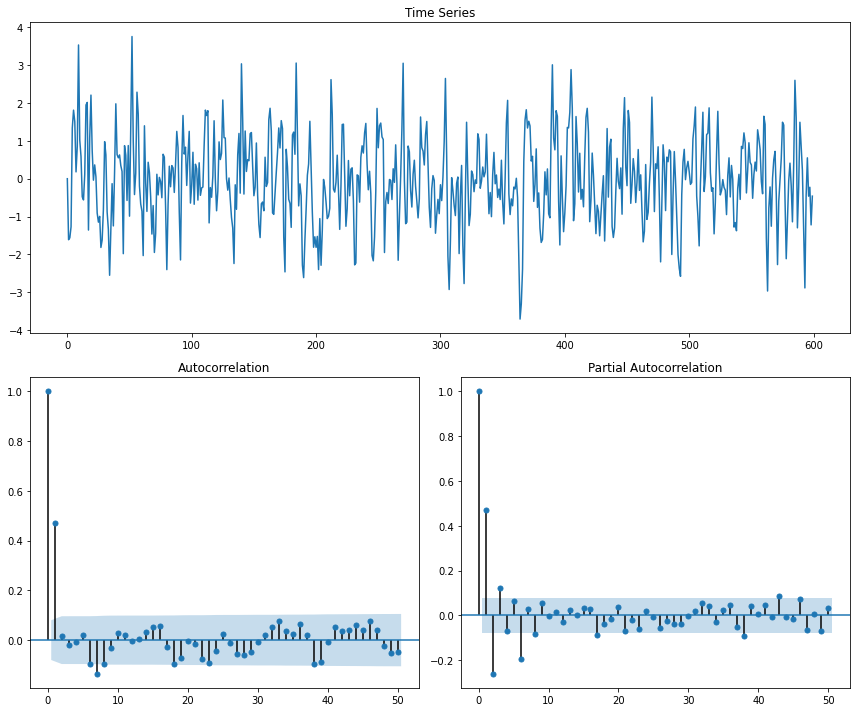

In [12]:
import statsmodels.tsa.api as smtsa

# Number of samples
n = 600

# Generate MA(1) data
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ma1_data)

As $n$ corresponds to the number of examples to be generated with the auto-regressive component and $ma$ explains the moving average component of the time series signal. To the moments, the inpact of the $ar$ coefiecient into the time series is zero. The signa generated wcprresponds to a $MA(1)$ dependency with 0.7 serial correlation between the error and can be represented as:

$$
x_t = 0.7 \epsilon_{t-1} + \epsilon_t
$$

To evaluate whether the time series signal consist of a MA or MR AR components, the autocorrelation (ACF) and partial autocorrelation (PACF) can be used. The ACF represents

$$
ACF = \frac{cov(x_t, x_{t-h})}{var(x_t)}
$$

The numerator in the preceding equation is the covariance between the time series signal at time $t$ and $t-h$, where $h$ is the lag on the time series. The PACF is also computed similar as ACF, except that the corrlation is computed by removing the already explained variance among intervals. Also common defined as conditional correlation. The first order ACF is similar to forst order PACF, with the second order (lag) PACF, the conditional probavility starts to have a significant role as

$$
PACF = \frac{cov(x_t, x_{t-2} | x_{t-1})}{\sqrt{var(x_t | x_{t-1})} \sqrt{var(x_{t-2}|x_{t-1}})}
$$

and so on

The ACF in the datset shows a 1-lag dependency. As the MA relationships is captured using $x_t = \theta \epsilon_{t-1} + \epsilon_t$, that is independent of lag terms, the ACF tends to capture the appriate order $q$ of the MA series. The confidence insterval is tested using the relation $\frac{+2}{\sqrt{N}}$, where $N$ and $\frac{1}{\sqrt{N}}$ represent an approximation of the standard devition, which is true under the independence condition. 

Lets see the impact of the MA component of ACF and PACF with higher order of $q$ using the following script.


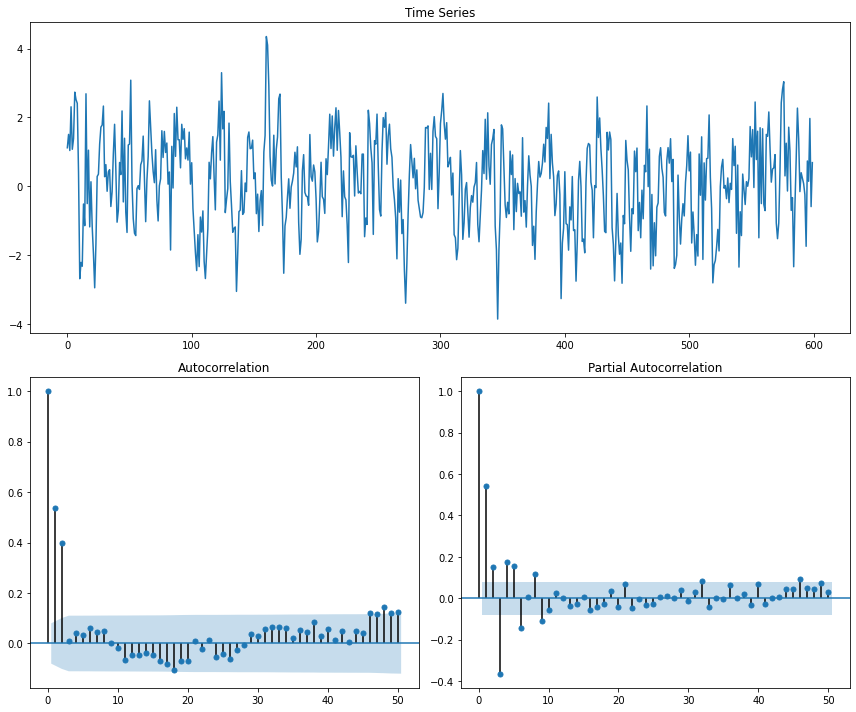

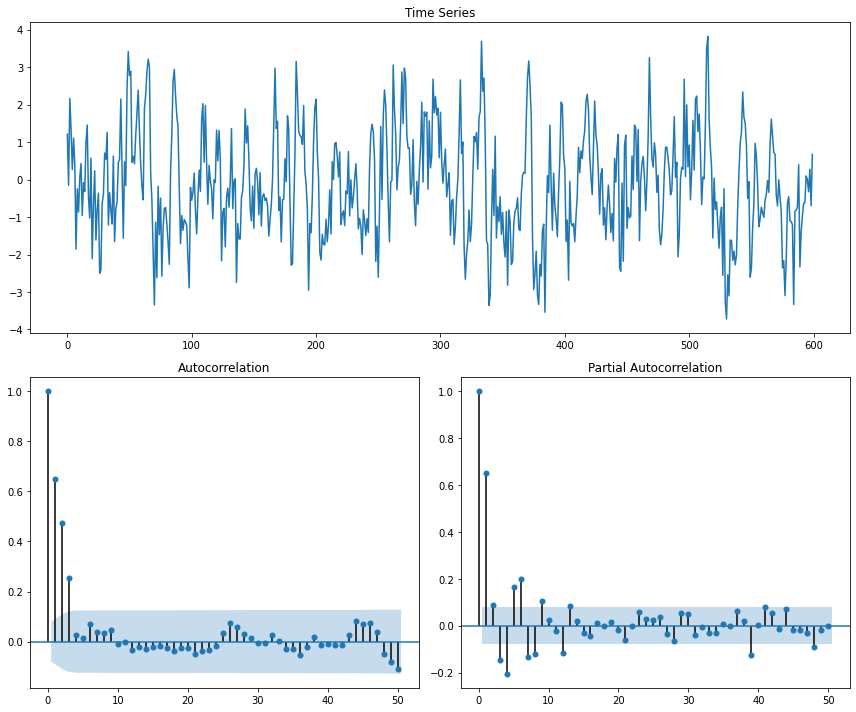

In [13]:
# Generate MA(2) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ma2_data)

# Generate MA(3) data
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar= ar, ma= ma, nsample= n)
plotds(ma3_data)


Usually, ACF defines erro serial correlation well and thus used do detect $MA(q)$, however, as the order increeases and other increases and other time components such as seasonilyty, trend, or stationary start to manifest, diciculting the interpretation. the $MA(q)$ assumes that the procees is stationary and error corresponds to white noise to ensure umbiased estimation. Examples from $MA(2)$ and $MA(3)$ exibith some seasonality, doficulting the onterpretation. 



In [14]:
# Build an MA(1) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order= (0, 1)).fit(maxlag= 30, method= 'mle', trend= 'nc') # Order of the AR is keep zero
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -818.748
Method:                           mle   S.D. of innovations              0.947
Date:                Thu, 31 Dec 2020   AIC                           1641.497
Time:                        15:07:30   BIC                           1650.291
Sample:                             0   HQIC                          1644.920
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6740      0.034     19.710      0.000       0.607       0.741
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4837           +0.0000j            1.4837            0.5000
-----------------------------------------------------------------------------
"""

The model has captured 0.702 correlation between residuals. Lets evaluate the mode for the $MA(3)$


In [15]:
ma3 = smtsa.ARMA(ma3_data.tolist(), order= (0, 3)).fit(maxlag= 30, method= 'mle', trend= 'nc')
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -841.167
Method:                           mle   S.D. of innovations              0.982
Date:                Thu, 31 Dec 2020   AIC                           1690.335
Time:                        15:07:33   BIC                           1707.922
Sample:                             0   HQIC                          1697.181
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5865      0.035     16.553      0.000       0.517       0.656
ma.L2.y        0.7009      0.034     20.703      0.000       0.635       0.767
ma.L3.y        0.4973      0.034     14.623      0.000       0.431       0.564
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0504           -1.1528j            1.1539           -0.2430
MA.2            0.0504           +1.1528j            1.1539            0.2430
MA.3           -1.5101           -0.0000j            1.5101           -0.5000
-----------------------------------------------------------------------------
"""

## Building Datasets with ARMA

Lets now build a auto-regressive model $AR(p)$, that regresses on its own lagged terms and moving average model $MA(q)$ that builds a funciton of error terms of the past events. the $AR(p)$ model tends to capture the mean reversion effect while $MA(q) models tens to capture the shock effect in error, that are not commonly, and normnaly corresponds to unpredicted events. This way, ARMA model combines the power of AR and MA components together. An $ARMA(p, q)$ time series forescasting model incorporates the $p^{th}$ order $AR$ and $q^{th}$ order MA model, respectively.

The ARMA (1, 1) model can be represented as

$$
x_t = \alpha + \phi_1 x_{t-1} - \theta_1 \epsilon_{t-1} + \epsilon_t
$$


The ARMA (1, 2) model can be represented as

$$
x_t = \alpha + \phi_1 x_{t-1} - \theta_1 \epsilon_{t-1}  theta_2 \epsilon_{t-2} + \epsilon_t
$$

and so on..

here $phi$ and $\theta$ represents the AR and MA coeficients. The $\alpha$ and $\epsilon_t$ captures the intercept and error at time $t$. The form gets very complicated as $p$ and $q$ increases, thus, lag operators are used for a concise representation of the ARMA models. Assuming the $L$ represent a lag operator, and depending on the unit moved, we apply it by $k$ times. These are commonly referred as back shift operators

$$
L x_t = x_{t - 1}
$$


$$
L^2 x_t = x_{t - 2}
$$



$$
L^p x_t = X_{t - p}
$$

Using a lag operator, the first order auto regressive modle can be written as 

$$
AR(1) : ( 1 - \phi L)x_t = \epsilon_t
$$

In similar ways, the moving order for first order equation by rearanging previous equation

$$
MA(1) :  x_t = ( 1 - \phi L) \epsilon_t
$$

All the preciding equations can be extended for higher order AR and MA models as

$$
AR(p): (1 - \phi_1 L - \phi_2 L^2 - \cdots \phi_p L^p)x_t = \epsilon_t
$$

The preceding two can be combined, forming the ARMA model as

$$
MA(q): x_t = (1 - \phi_1 L - \phi_2 L^2 - \cdots - \phi_q L^q)\epsilon_t
$$


These representation are also commnly used in the study of impulse-response functions. The impulse-response function captures the effort on response for $x$ given a shock at time $l$ with $l < t$. Simillarly, can be also considered as an effect on the dynamic system reposne given some eternal change. 

Lets now generate a $ARMA(1, 1)$ data and make use of AR and MA components.

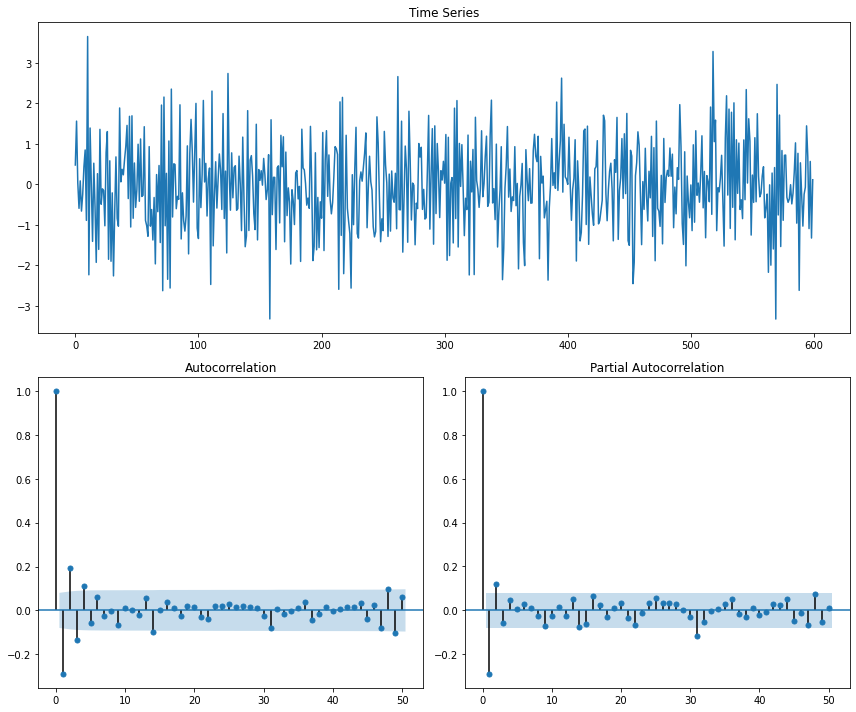

In [16]:
# Number of samples
n = 600

# Generate the AR(1) data
ar = np.r_[1, 0.6] # 1 order, lag
ma = np.r_[1, 0.3]

ar1ma1_data = smtsa.arma_generate_sample(ar = ar, ma= ma, nsample= n)
plotds(ar1ma1_data)


is very common to observe that Sales processes in general follow an $ARMA(1,1)$ model as slaes in time $t$ isa function of prior sales at time $t-1$, that plays an important role in the $AR$ component. The $MA(1)$ component of $ARMA(1, 1)$ can be attributed to time-based offers by a particular company, such as distribution of coupons that lead to the moving average effect to increase temporaraly os sales, and the change in sales effect is captured by the moving average component. Previous plot both ACF and PACF exibith a sin curve with strong correlation at initial lags, thus both $p$ and $q$ parameters are present. The are multiple scenarios to select $p$ and $q$, and somo common rules of thumbs can be used to determine the order of the ARMA components:

* Autocorrelation is exponentially decreasing and PACF has significant corrlation at lag 1, the use the parameter $p$

* Autocorrelation is forming a sine wave and PACF has significant correlation at lags 1 and 2, then use second order value for $p$

* Autocorrelation has significant autocorrelation and PACF exibiths an exponential decay, the moving average is present and the $q$ parameter need to be setup.

* Autocorrelation shows an significant serial correlation and the PACF shows sine.wave pattern, then setup a moving average $q$ parameter.

In $ARMA(1,1)$ the time series data, both ACF and PACF exibiths sine-wave patterm $p$ and $q$ both parameters are affecting the time series signal. The impact of lags can be computed using impulse-response curve, as shown below TODO HSO

Text(0.5, 0, 'Lag')

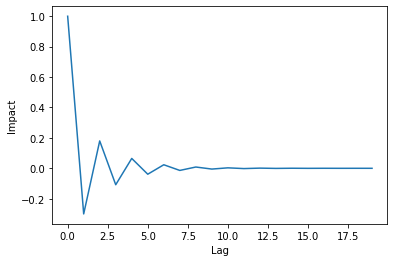

In [17]:
from statsmodels.tsa import arima_process

# Impluse response curve
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")

In image, after five lags, there is a very minimal effect on the response. Lets evaluate the $AR$ and $MA$ values from data

In [18]:
# Build AR(1) model

ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order= (1, 1)).fit(maxlag= 30, method= 'mle', trend= 'nc')
ar1ma1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -873.019
Method:                           mle   S.D. of innovations              1.037
Date:                Thu, 31 Dec 2020   AIC                           1752.037
Time:                        15:07:49   BIC                           1765.228
Sample:                             0   HQIC                          1757.172
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6950      0.085     -8.180      0.000      -0.862      -0.528
ma.L1.y        0.4557      0.105      4.322      0.000       0.249       0.662
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4388           +0.0000j            1.4388            0.5000
MA.1           -2.1943           +0.0000j            2.1943            0.5000
-----------------------------------------------------------------------------
"""

The model outcome shows an AR coefficient of 0.59 and MA value of 0.29, that is close to values 0.6 and 0.3 used by AR and MA component respectively, to generate the time series. TO acces the performance, alkaline informaiton criteria (AIC) can be set to evaluate model performance with the main objective to minimize AIC. Lets evaluate the $p$ and $q$ orders using the AIC criteria thought a minimization on $ARMA(1,1)$ data



In [19]:
# Optimize ARMA parameters

aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj),).fit(maxlag=30, method='mle', trend='nc',  transparams=False)
        aicVal.append([ari, maj, arma_obj.aic])

Lets now start by using a ARMA model on real-time series data. The dataset correponds to the IBM stock prices from 1962 to 1965, the first step in to load modules


In [20]:
# Load the modules

from __future__ import print_function
import os
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt 

# Load Dataset
ibm_df = pd.read_csv(DATA_PATH + 'ibm-common-stock-closing-prices.csv')
ibm_df.head()

# Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace= True)
ibm_df.head()


,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


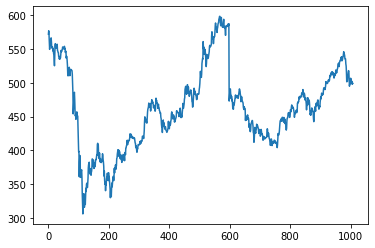

In [21]:
ibm_df.Close_Price.plot()
plt.savefig('')

The IBM plots shows a significant trend in the data over time. Lets now show the autocorrelation of the process for this data. 

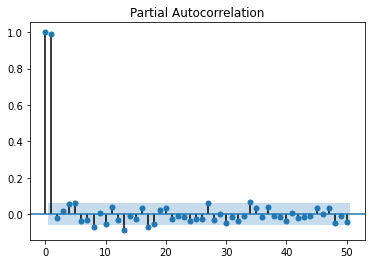

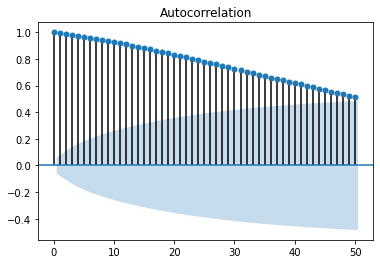

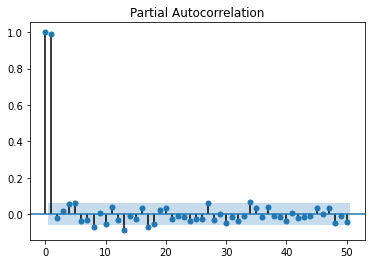

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ibm_df['residual']=ibm_df['Close_Price']-ibm_df['Close_Price'].mean()
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.residual, lags=50)
plot_pacf(ibm_df.residual, lags=50)


The ACF is linearly decaying, showing that a strong serial correlation; however, the partial autocorrelation shows that only one step dependency. Also, as the chart shows a positive autocorrelation, correction should be done using the AR component with first-order correlation. The QQ-plot for the signals helps to evaluate the normality assumtions. Lets plot the QQ-plot


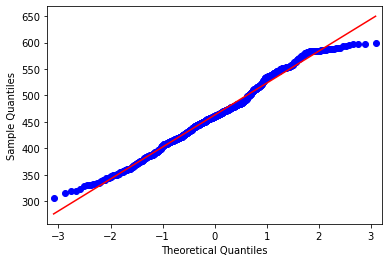

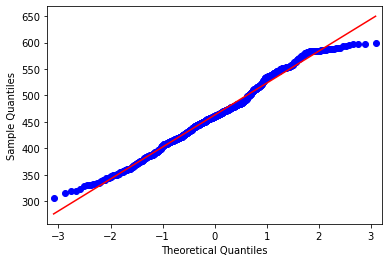

In [23]:
import statsmodels.api as sm
sm.qqplot(ibm_df['Close_Price'], line='s')


Lets plot the residuals


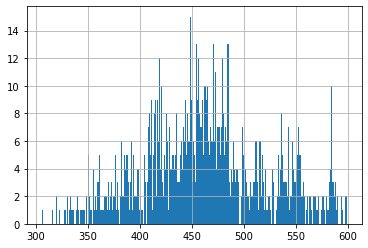

In [24]:
hist = ibm_df['Close_Price'].hist(bins=300)

Lets try get the optimal $p$ and $q$ order for the ARMA, lets perform a grid search using AIC minimization as the search criteria

In [25]:
aicVal=[]
for ari in range(1, 3): # iterate over the order
    for maj in range(0,3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1, 0)).fit(maxlag=30, method='mle', trend='nc')
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Thu, 31 Dec 2020   AIC                           6702.767
Time:                        15:08:35   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9223.136      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

The ARMA.fit function is used to fit the ARMA forecasting model with defined $p$ and $q$ models using maximum likelihood criteria. The outcome from the model is keept in an aicVal list


In [26]:
aicVal

[[1, 0, 6702.766710076168],
 [1, 1, 6704.704833955824],
 [1, 2, 6706.643594202904],
 [2, 0, 6704.705792808054],
 [2, 1, 6705.7368959964315],
 [2, 2, 6707.728882025961]]

The AIC recommends the ARMA(1,1) model (2 list row) as the optimal model with minimum AIC value. the ARMA(1, 1) model is refitted as the optimal model as

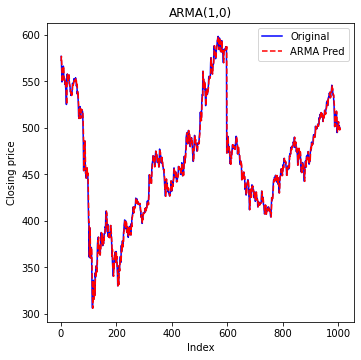

In [27]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

# Original
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr, label='Original')

# ARMA predict
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr, label='ARMA Pred')

axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')
plt.legend()
plt.show()


The AIC score recommends a model of ARMA(1,0) with AIC score of 6702.7. The actual
versus fitted value using ARMA(1,0) is as follows

Text(0, 0.5, 'Closing price')

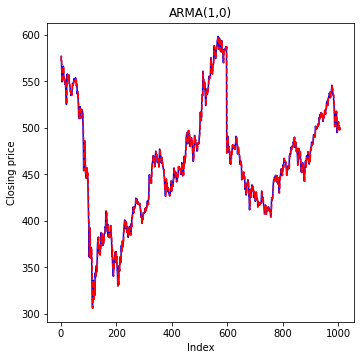

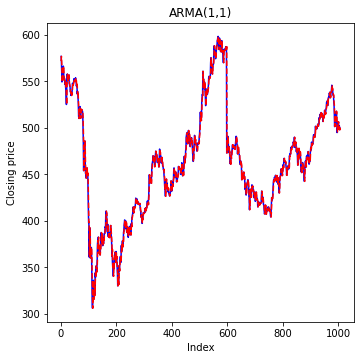

In [28]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price') 

# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,1)')
plt.xlabel('Index')
plt.ylabel('Closing price')


One of the major limitations of these models are that they ignore the volatility factor making
the signal non-stationary. The AR modeling is under consideration process is stationary!!!,
that is, error term is IID (independent Indentical Distributed) and follows normal distribution $\epsilon_t ∼ N(0,\sigma_{epsilon}^2)$ and $|\phi|<1$. The $|\phi|<1$ condition makes the time series a finite time series as the effect of more recent observations in time series would be higher as compared to prior observations. 
The series that do not satisfy these assumptions fall into non-stationary series. An example of the non-stationary
process is shown here:

TODO: Plot an examples of non.stationary


For the preceding plot, it can be seen that the variance of the process keeps increasing on the end of the dataset and there is a strong trend that is observed in ACF. The ARIMA accounts for thse scenarios that are non-stationary for the forescasting


## ARIMA

ARIMA, also Box-Jenkins model, corresponds to a generalization of the ARMA model by including an integrative component. The integrated components are usefull when data is non-stationary, and the integrated part of ARIMA helpt in reducing the non-stationarity. The ARIMA applies differencing on time series one or more times to remove the non-stationary effect. The ARIMA(p,d,q) represent the order of AR, MA and differencing components. The major differences between ARMA and ARIMA models is the $d$ component, which updates the series on which forecasting model is built. The $d$ component aims to detrend the signal to make it stationary and ARMA model can then be applied to the de-trended data.  For different value of $d$, the series reponse changes:

* For $d=0$: $x_t = x_t

* For $d=1$: $x_t = x_t - x_{t-1}$

* For $d=2$: $x_t = (x_t - X_{t-1}) - (x_{t-1} - x_{t-2}) = x_t - 2 x_{t-1} - x_{t-2}

As can be seen, the second difference is not two periods ago, rather it is the difference of the fisrt different, that is, $d=1$. Lets say that $\hat{x}_t$ represents the differenced response and so ARIMA forecasting can be written as follows:

$$
\hat{x}_t = \phi_1 \hat{x}_{t-1} + \phi_2 \hat{x}_{t-2} + \cdots + \phi_p \hat{}_{t-q} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \theta_q \epsilon_{t-q} + \epsilon_t
$$

Depending on the order of $p$m $d$ and $q$, the model behaves differently. For example, $ARIMA(1, 0, 0)$ is a forst order AR model. Similarly, $ARIMA(0,0,1)$ is a first order MA model.

Lets take an example of ARIMA(0, 1, 0) to see the different components of ARIMA modeling. The $ARIMA(0, 1, 0)$ represnts a random walk model. The random walk model depends only on the last time instance and can be represneted as 

$$
x_t = x_{t-1} + \epsilon_t
$$

The preceding random walk equation can be also represented in lag operatores as

$$
(1 - L) x_t = \epsilon_t
$$

Here, $\epsilon_t ~ N(0, \sigma^2) is the error component and follows normal distribution. Adding a constant to the preceding random walk model will cause a drift in the model, which is also stochastic in nature as in the following equation:

$$
(1 -L) x_t = \alpha + \epsilon_t
$$

Here, $\alpha$ is a drift operator that will give a drifting effect to the time series signals. Lets illustrate ARIMA modeling using DOWN Jones Indices data series (DJIA) from 207


In [29]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

djia_df = pd.read_excel(DATA_PATH + 'DJIA_Jan2016_Dec2016.xlsx')

# Quick overview
djia_df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


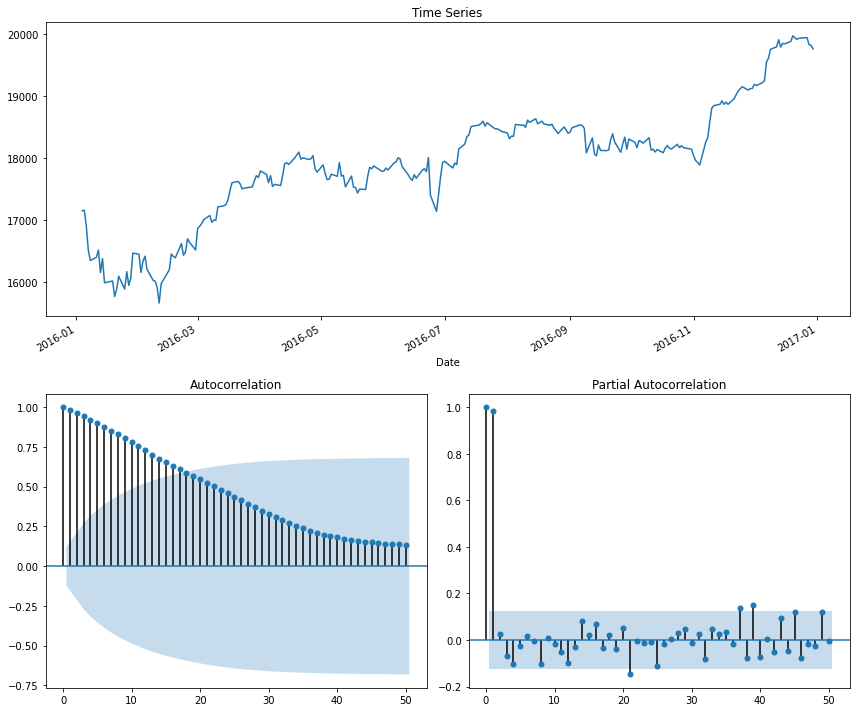

In [30]:
#Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

# Plot ACF and PACF
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)

Is clear evident that this dataset shows non-stationary signal with a increasing trend. The ACF is also showing an exponential decay while PACF has a strong correlation in lag 2. We can also check the non-stationary by evaluating the mean and varianc ealong different time periods. The differenc on mean and variance on those periods can be used to validate the hypotesis of non-stationarity. As example we split the datset into two semesters jan-jun and jul Dec and evaluate the mean

In [31]:
mean_1, mean_2 = djia_df.iloc[: 125].Close.mean(), djia_df.iloc[125:].Close.mean() # Set the two intervals

var_1, var_2 =  djia_df.iloc[: 125].Close.var(), djia_df.iloc[125:].Close.var()

print('mean_1 = %f, mean_2 = %f' % (mean_1, mean_2))
print('variance_1 = %f, variance_2 = %f' %(var_1, var_2))


mean_1 = 17226.579164, mean_2 = 18616.603593
variance_1 = 487045.734003, variance_2 = 325183.639530


The values of mean and variance among the two semeetrs variate very sigbificatly bioth in mean and variance, suggesting that the data is non-stationary. One common apporach is the use of Augmented Dickey-Fuller (ADF) test. The ADF test consist in a unit root tets that evaluates the strenght of trend in a time series component. The ADF makes use of a high order AR models set with a objective to optimize the information criterion.  Lets consider an $AR(3)$ model as

$$
x_t = \phi_1 x_{t-1} - \phi_2 x_{t-2} - \phi_3 x_{t-3} = \epsilon_t
$$

Now lets write this usig the difference lag term

$$
x_t = (\phi_1 + \phi_2 + \phi_3) x_{t-1} - (\phi_2 + \phi_3)(x_{t-1} - x_{t-2}) - \phi_3(x_{t-2} - x_{t-3}) \epsilon_t
$$

Lets put thing more shorter making use of aux variable $p$

$$
x_t = p_1 x_{t-1} - p_2 (x_{t-1} - x_{t-2}) - p_3(x_{t-2} - x_{t-3}) \epsilon_t
$$

Now rewrititng using the lag operators
$$
(1 - \phi_1 L - \phi_2 L^2 - \phi_3 L^3)x_t = \epsilon_t
$$

The ADF solves the precedijg equatuon with the asusmtion that $L=1$ corresponds to the solution of the preceding polynomial, which can be represented as

$$
1 - \phi1_ L \phi_2 L^2 - \phi_3 L^3 = 0
$$

Putting $L=1$, we can further reduce this 

$$
\phi_1 + \phi_2 + \phi_3 = 1
$$

For unit root, the lag difference can be written as

$$
\Delta x_t = (p_1 -1) x_{t-1} + \sum_{i=2} p_t (\Delta x_{t-t+1}) + \epsilon_t
$$


The equiation is used to determine the Ar lag component using the Schwartz Baeysian information criteria or by minimizong the Akaike information criterion (AIC). Whe a strong autocorrelation is present, the original series requires differencing. The NULL hypothesis of the ADF prposes that $H_0=  \eth < 0$.In other words, the alternative hypothesis suggests stationarity of the data.





In [32]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(djia_df.Close.to_list())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


Ideally, a more negative value of ADF statistics will represent a stationary signal. For the given dataset, as $p-value$ is wuite high, we cannot reject the NULL hypotesys making it a non-stationary signal. The majorotu of the packages ensure stationarity is sstisfyed before eecuting the models. Lets view an $qqplot$ of this. 

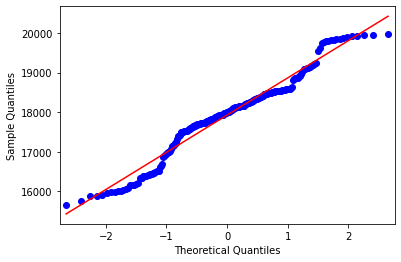

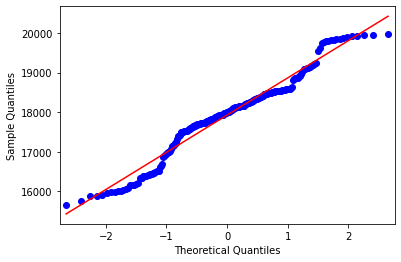

In [33]:
# QQ plot and probability plot
sm.qqplot(djia_df['Close'], line='s')

The qqplot shows a sigbificant non-normality within the DJIIA dataset. Most of the core packages check for stationarity, and in case its not satisfyed it raises a error. Lets force a $ARMA(1, 1)$ model on the current data

In [34]:
# Force fit ARMA(1, 1) model on this non-stationar data
arma_obj = smtsa.ARMA(djia_df['Close'].tolist(), order= (1, 1)).fit(maxlag= 30, methods='mle', trend='nc')

ValueError: ignored

We now saw an error raised

Lets now differeciate to make the signal stationary


Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

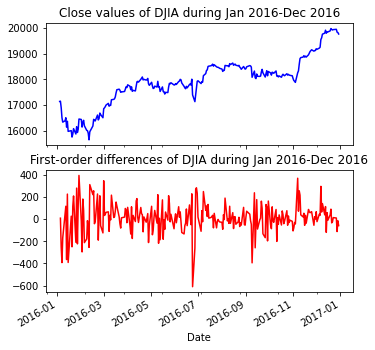

In [35]:
#Let us plot the original time series and first-differences
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')


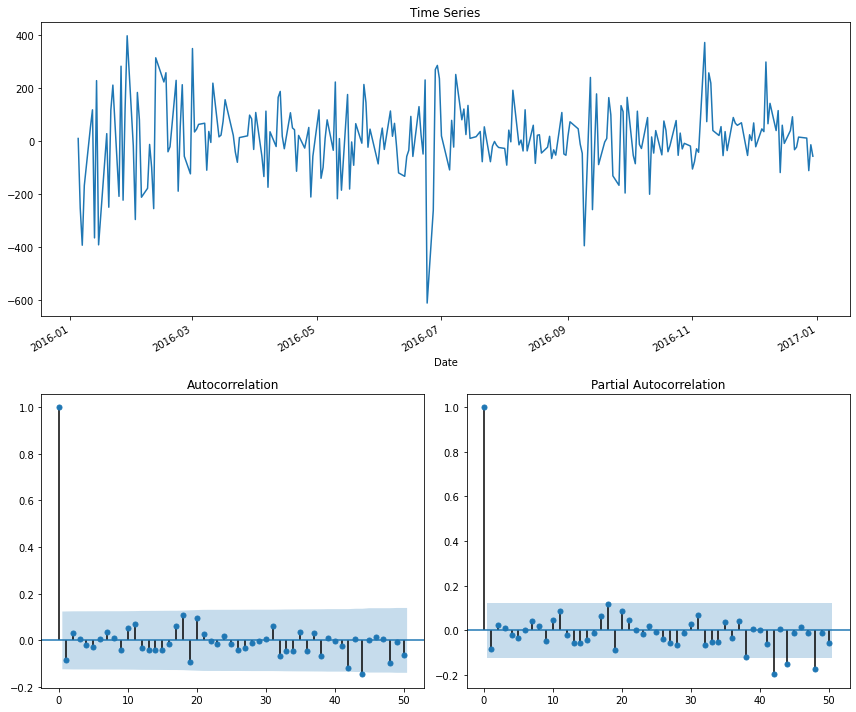

In [36]:
# Plot ACF and PACF with teh differnection done (now stationary)
plotds(first_order_diff, nlag=50)


ADF Statistic: -17.135094
p-value: 0.000000


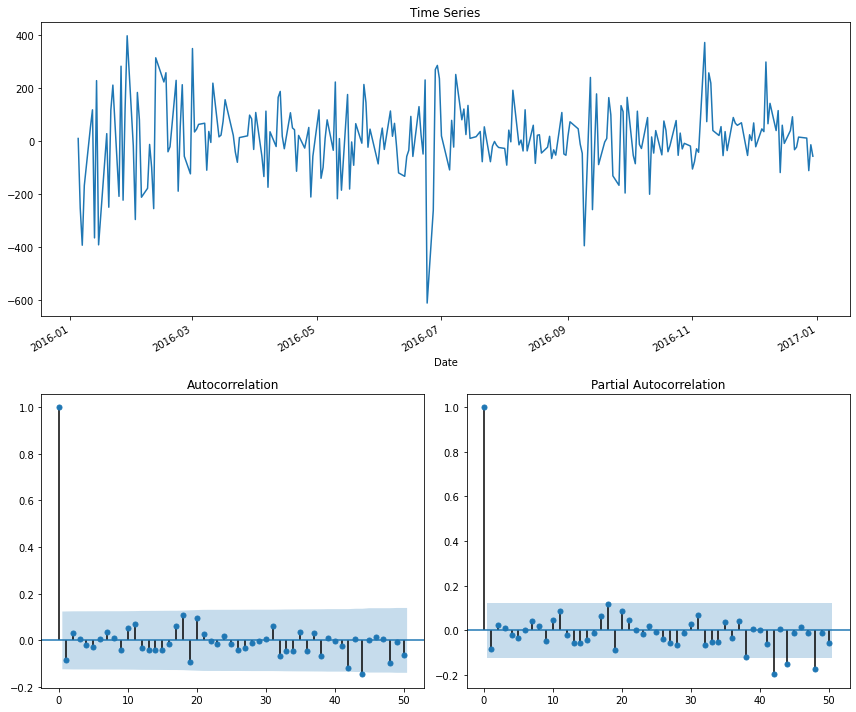

In [37]:
# plot signal
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])


The ADF statistics show ton residuals have a value clsoe to zero, stating that the model is stationary, however, both ACF and PACF show not to much of trend of the moving average component showing a random walk behaviour. Also, another way to run is to optimize using AIC as a criteria.


In [38]:
# Optimize ARMA parameters
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(djia_df['Close'].tolist(), order=(ari,d ,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [39]:
aicVal_sorted = sorted(aicVal, key=lambda x: x[3], reverse= True)
aicVal_sorted


[[0, 2, 0, 3364.451294991992],
 [1, 2, 0, 3274.7348977599813],
 [2, 2, 0, 3242.247697002377],
 [2, 1, 2, 3188.7125454974007],
 [2, 1, 1, 3186.7685269755893],
 [1, 1, 1, 3184.7361514947997],
 [2, 1, 0, 3184.6953586905915],
 [0, 1, 2, 3184.6622787227266],
 [0, 1, 1, 3182.9315503221464],
 [1, 1, 0, 3182.8371527870027],
 [0, 1, 0, 3182.6357271384236],
 [2, 2, 2, 3180.938305940924],
 [1, 2, 2, 3179.888758441404],
 [2, 2, 1, 3179.8412946322433],
 [1, 2, 1, 3177.995313194253],
 [0, 2, 1, 3177.769461064925]]

As the AIC between models are very close, it is recommended to carefull pick the correct model. List start by using the $ARIMA(0, 2, 1)$ for model fitting and evaluation. The $ARIMA(0, 2, 1)$ applies second order differentiation and first order moving average component to determine the relationship between onbservations. the model parameter can be setu as following

In [40]:
# Optimal ARIMA model
arima_obj = ARIMA(djia_df['Close'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

# Evaluate prediction
pred=np.append([0,0],arima_obj_fit.fittedvalues.tolist())
djia_df['ARIMA']=pred
diffval=np.append([0,0], arima_obj_fit.resid+arima_obj_fit.fittedvalues)
djia_df['diffval']=diffval


Lets plot the actual vs the forecasted values 

Text(0, 0.5, 'Closing')

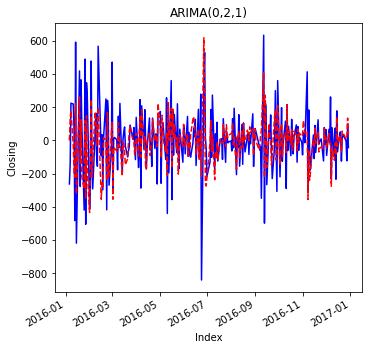

In [41]:
# Plot output
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
djia_df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing')


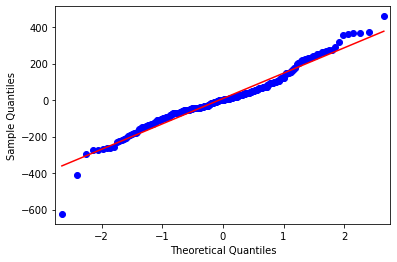

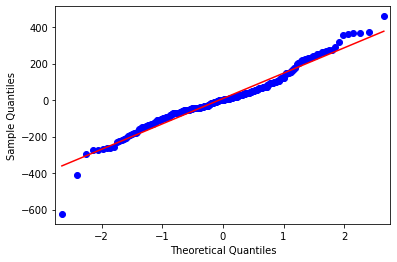

In [42]:
# QQ plot and probability plot
sm.qqplot(arima_obj_fit.resid, line='s')

In [43]:
# Forecasting
f, err, ci=arima_obj_fit.forecast(40)
djia_df['forecast'] = arima_obj_fit.forecast(10) 
djia_df[['Close', 'forecast']].plot(figsize=(12, 8))


ValueError: ignored

The qq plot with this model shows a significant normality fit. The error normality can be also evaluated with teh Shapiro-wilk test.


An extension of the ARIMA model inclused the seasonality component for AR, I and MA. THe seasonal ARIMA is represented as ARIMA(p,d,q) $(P, D, Q)_m$ where the $P, D, Q)$ represents teh seasonal part of the auto-regressive, integrated, and moving average, respectively. The $m$ in the seasonal ARIMA model represents the  umnr of periods per season. In some scenarios when seasonality is present, the extra steps of seasonal difference and seasonal adjustiment may be required to ensure that the signal is stationary. We can use the following script to evaluate the seasonality

In [44]:

##############
# SARIMAX
##############
# Seasonality (based on first difference ACF shows significance at 42 lag)
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0,2,1), seasonal_order=(1,1,1,42))
sarimax= mod.fit()
sarimax.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Thu, 31 Dec 2020   AIC                           2741.141
Time:                                    15:10:40   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.163     -0.062      0.951     -32.679      30.679
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (Q):                       31.80   Jarque-Bera (JB):                21.28
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model shows significant improvement in terms of AIC and can be further optimized for
different components involved in the SARIMAX model.

## Confidence interval

One of the commonly asked questions in forecasting is, What is the confidence interval for
estimates? The confidence level in a forecasting model is defined by the alpha parameter in
the forecast function. The alpha value 0.05 represents an estimate with 95% confidence,
which can be interpreted as the estimates returned by the model have 5% probability of not
falling in the defined distribution range. The confidence interval is evaluated as follows:



Text(0, 0.5, 'Forecasted value')

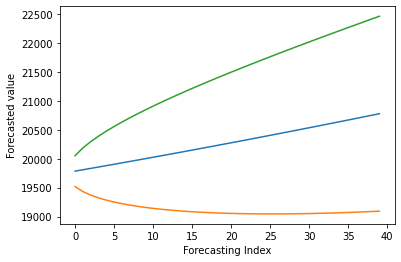

In [45]:
# Forecasting and CI
f, err, ci=arima_obj_fit.forecast(40)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')


Here, Zα is the critical value defined based on alpha. For the alpha value 0.05, the critical
value is 1.96. The confidence interval with an alpha value 0.05 for the DJIA dataset modeled
using the ARIMA(0,2,1) model can be obtained using the forecast function from the
arima_obj_fit object:

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

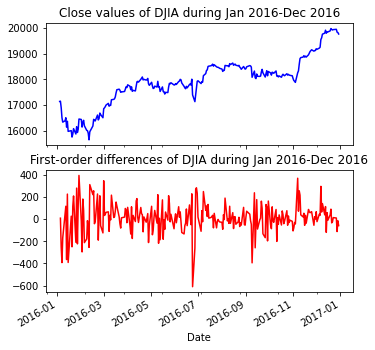

In [46]:
#Let us plot the original time series and first-differences
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')
